# Match Analysis

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")


%matplotlib inline

## Data Cleaning and Exploration

In [85]:
matches = pd.read_csv("matches.csv" , index_col = "id")
matches = matches.iloc[:,:-3]

In [86]:
matches.shape

(756, 14)

In [87]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

## Taking in consideration only KKR VS RR matches

In [88]:
KR = matches[np.logical_or(np.logical_and(matches['team1']=='Kolkata Knight Riders',matches['team2']=='Rajasthan Royals'),
                            np.logical_and(matches['team2']=='Kolkata Knight Riders',matches['team1']=='Rajasthan Royals'))]

In [89]:
KR.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
78,2008,Jaipur,2008-05-01,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,Rajasthan Royals,45,0,SA Asnodkar,Sawai Mansingh Stadium
105,2008,Kolkata,2008-05-20,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,6,YK Pathan,Eden Gardens
126,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands
168,2009,Durban,2009-05-20,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,4,LR Shukla,Kingsmead
187,2010,Ahmedabad,2010-03-20,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,Rajasthan Royals,34,0,AA Jhunjhunwala,"Sardar Patel Stadium, Motera"


In [90]:
KR.shape

(20, 14)

In [91]:
KR.season.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2018, 2019],
      dtype=int64)

In [92]:
KR.isnull().sum()

season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [93]:
KR.describe().iloc[:,2:].T

,count,mean,std,min,25%,50%,75%,max
win_by_runs,20.0,8.2,13.547577,0.0,0.0,0.0,12.25,45.0
win_by_wickets,20.0,3.6,3.618665,0.0,0.0,3.5,7.25,9.0


## Head To Head

In [94]:
KR.groupby("winner")["winner"].count()

winner
Kolkata Knight Riders    10
Rajasthan Royals         10
Name: winner, dtype: int64

Text(0.5, 1.0, 'RR VS KKR-head to head')

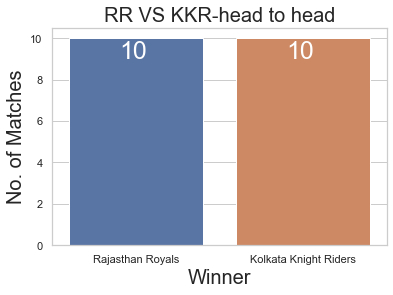

In [95]:
sns.countplot(KR["winner"])
plt.text(-0.1,9,str(KR['winner'].value_counts()['Kolkata Knight Riders']),size=25,color='white')
plt.text(0.9,9,str(KR['winner'].value_counts()['Rajasthan Royals']),size=25,color='white')
plt.xlabel('Winner',fontsize=20)
plt.ylabel('No. of Matches',fontsize=20)
plt.title('RR VS KKR-head to head',fontsize = 20)

In [96]:
Season_wise_Match_Winner = pd.DataFrame(KR.groupby(["season","winner"])["winner"].count())

Season_wise_Match_Winner.columns = ["winner count"]

print("Season wise winner of matches between RR VS KKR :")
Season_wise_Match_Winner

Season wise winner of matches between RR VS KKR :


winner count
season winner                             
2008   Rajasthan Royals                  2
2009   Kolkata Knight Riders             1
       Rajasthan Royals                  1
2010   Kolkata Knight Riders             1
       Rajasthan Royals                  1
2011   Kolkata Knight Riders             2
2012   Kolkata Knight Riders             1
       Rajasthan Royals                  1
2013   Kolkata Knight Riders             1
       Rajasthan Royals                  1
2014   Rajasthan Royals                  2
2015   Rajasthan Royals                  1
2018   Kolkata Knight Riders             3
2019   Kolkata Knight Riders             1
       Rajasthan Royals                  1

## Winning Percentage

In [97]:
Winning_Percentage = KR['winner'].value_counts()/len(KR['winner'])

In [98]:
print("KKR winning percentage against RR(overall) : {}%".format(int(round(Winning_Percentage[0]*100))))
print("RR winning percentage against KKR(overall) : {}%".format(int(round(Winning_Percentage[1]*100))))

KKR winning percentage against RR(overall) : 50%
RR winning percentage against KKR(overall) : 50%


## Performance Analysis

In [99]:
def performance( team_name , given_df ):
    for value in given_df.groupby('winner'):
        if value[0] == team_name:

            total_win_by_runs = sum(list(value[1]['win_by_runs']))
            total_win_by_wickets = sum(list(value[1]['win_by_wickets']))
            
            if 0 in list(value[1]['win_by_runs'].value_counts().index):
                x = value[1]['win_by_runs'].value_counts()[0]
            else:
                x = 0
                
            if 0 in list(value[1]['win_by_wickets'].value_counts().index):
                y = value[1]['win_by_wickets'].value_counts()[0]
            else:
                y = 0
                
            number_of_times_given_team_win_while_defending = (len(value[1]) - x )
            number_of_times_given_team_win_while_chasing = (len(value[1]) - y )
            
            average_runs_by_which_a_given_team_wins_while_defending = total_win_by_runs / number_of_times_given_team_win_while_defending
            average_wickets_by_which_a_given_team_wins_while_chasing = total_win_by_wickets / number_of_times_given_team_win_while_chasing
            
            print('Number of times given team win while defending :' , number_of_times_given_team_win_while_defending ) 
            print('Number of times given team win while chasing   :' , number_of_times_given_team_win_while_chasing )
            print()
            print('Average runs by which a given team wins while defending  : ' ,round(average_runs_by_which_a_given_team_wins_while_defending))
            print('Average wickets by which a given team wins while chasing : ' ,round(average_wickets_by_which_a_given_team_wins_while_chasing))

In [100]:
performance("Kolkata Knight Riders",KR)

Number of times given team win while defending : 1
Number of times given team win while chasing   : 9

Average runs by which a given team wins while defending  :  25.0
Average wickets by which a given team wins while chasing :  7.0


In [101]:
performance("Rajasthan Royals",KR)

Number of times given team win while defending : 6
Number of times given team win while chasing   : 2

Average runs by which a given team wins while defending  :  23.0
Average wickets by which a given team wins while chasing :  4.0


## Toss Analysis

In [102]:
Toss_Decision = pd.DataFrame(KR.groupby(['toss_winner',"toss_decision"])["toss_decision"].count())

print ("Toss winner decision :")
Toss_Decision

Toss winner decision :


toss_decision
toss_winner           toss_decision               
Kolkata Knight Riders field                     10
Rajasthan Royals      bat                        7
                      field                      3

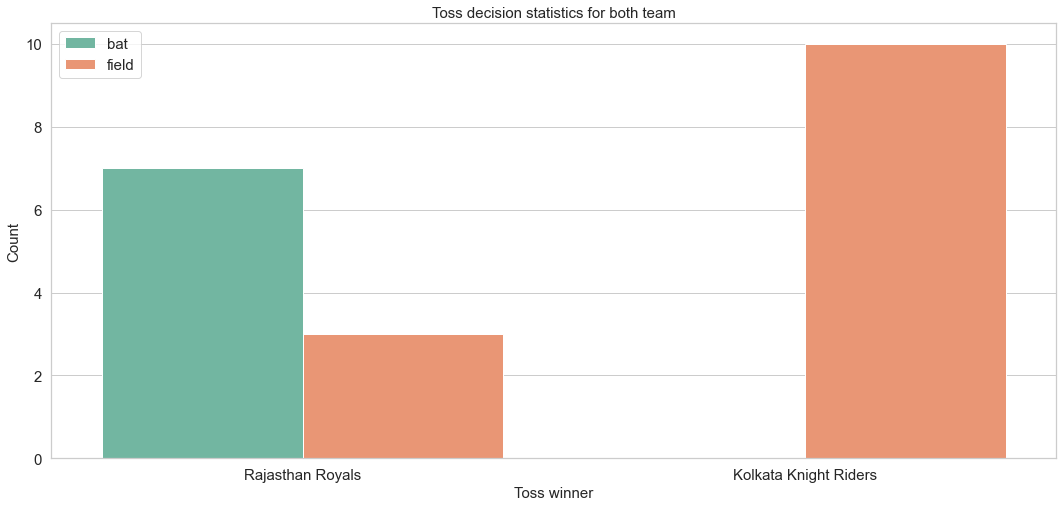

In [103]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,8))
sns.countplot(KR['toss_winner'],palette='Set2',hue=KR['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

In [104]:
Toss_Decision_based_Winner = pd.DataFrame(KR.groupby(['toss_winner',"toss_decision","winner"])["winner"].count())

print(" No of times toss winning decision leading to match winning : ")
Toss_Decision_based_Winner

 No of times toss winning decision leading to match winning : 


winner
toss_winner           toss_decision winner                       
Kolkata Knight Riders field         Kolkata Knight Riders       6
                                    Rajasthan Royals            4
Rajasthan Royals      bat           Kolkata Knight Riders       3
                                    Rajasthan Royals            4
                      field         Kolkata Knight Riders       1
                                    Rajasthan Royals            2

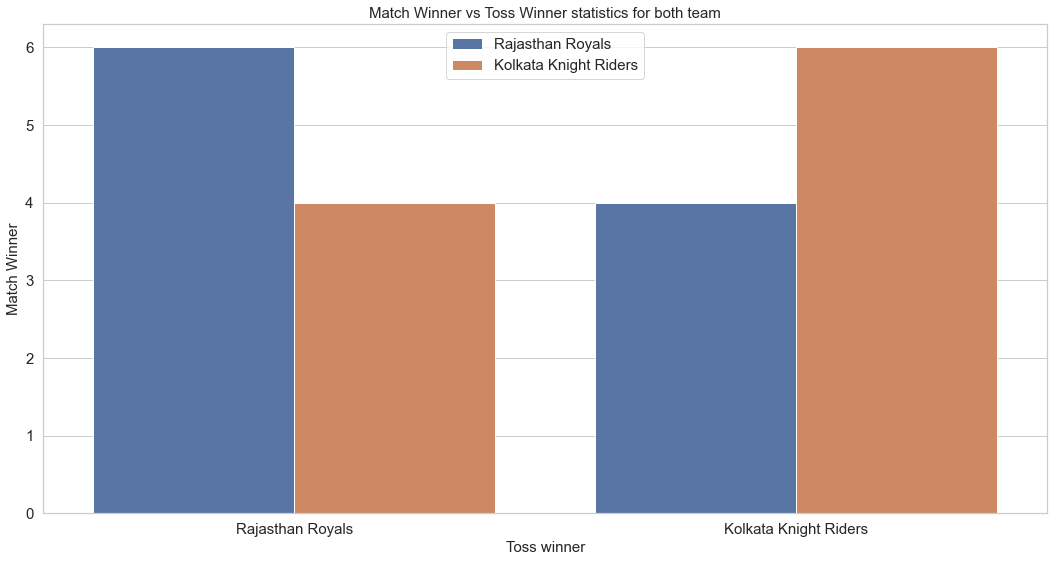

In [105]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(KR['toss_winner'],hue=KR['winner'])
plt.title('Match Winner vs Toss Winner statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

### Toss Decision based Analysis of both the teams seperately :

In [106]:
KKR = KR[KR["toss_winner"]=="Kolkata Knight Riders"]
RR = KR[KR["toss_winner"]=="Rajasthan Royals"]

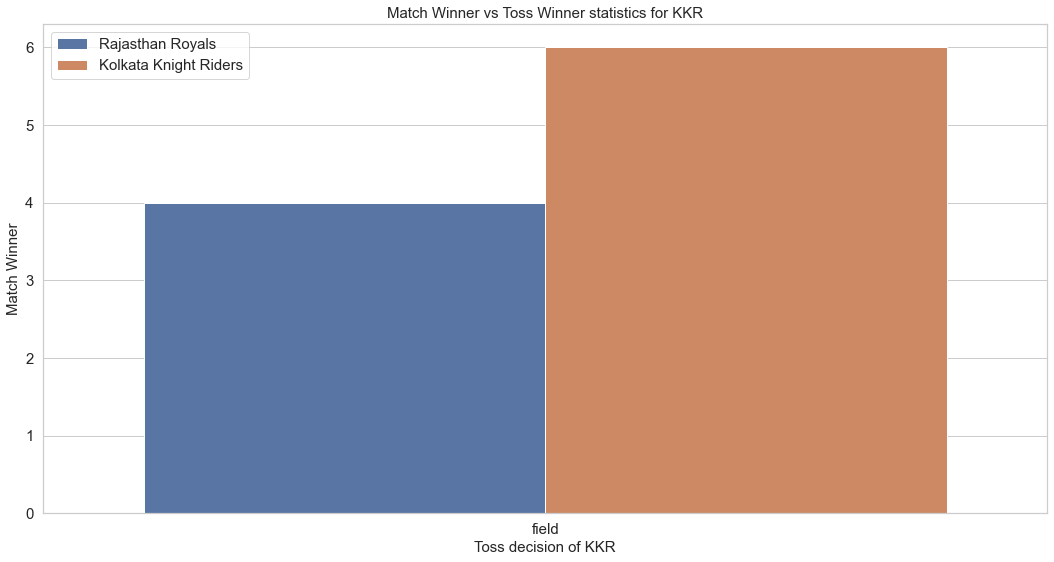

In [107]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(KKR['toss_decision'],hue=KKR['winner'])
plt.title('Match Winner vs Toss Winner statistics for KKR',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of KKR',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

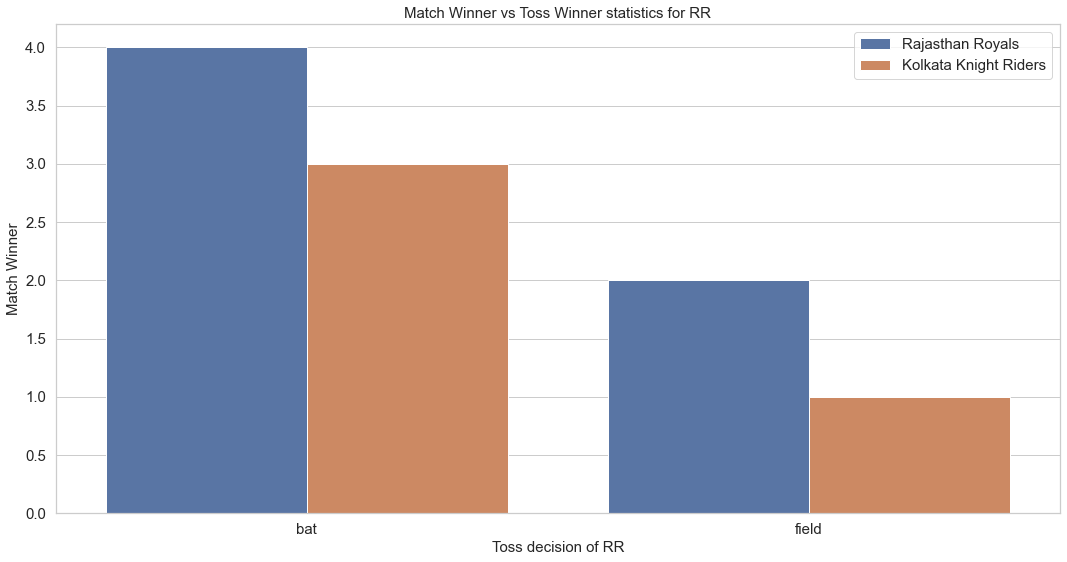

In [108]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(RR['toss_decision'],hue=RR['winner'])
plt.title('Match Winner vs Toss Winner statistics for RR',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of RR',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

In [109]:
player_of_the_match = pd.DataFrame(KR.player_of_match.value_counts())

print("Man of the match :")

player_of_the_match

Man of the match :


,player_of_match
YK Pathan,3
JD Unadkat,1
SR Watson,1
AA Jhunjhunwala,1
H Gurney,1
G Gambhir,1
JP Faulkner,1
Shakib Al Hasan,1
Kuldeep Yadav,1
SA Asnodkar,1


## Recent Year Performance Analysis

In [110]:
cond2 = KR["season"] == 2018
cond3 = KR["season"] == 2019
final = KR[cond2 | cond3]
final

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
7908,2018,Jaipur,18/04/18,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,7,N Rana,Sawai Mansingh Stadium
7942,2018,Kolkata,15/05/18,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,Kuldeep Yadav,Eden Gardens
7951,2018,Kolkata,23/05/18,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kolkata Knight Riders,25,0,AD Russell,Eden Gardens
11312,2019,Jaipur,07/04/19,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,H Gurney,Sawai Mansingh Stadium
11334,2019,Kolkata,25/04/19,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,VR Aaron,Eden Gardens


In [111]:
final.shape

(5, 14)

In [112]:
player = pd.DataFrame(final.player_of_match.value_counts())

print("Man of the match :")
player

Man of the match :


,player_of_match
VR Aaron,1
H Gurney,1
AD Russell,1
Kuldeep Yadav,1
N Rana,1


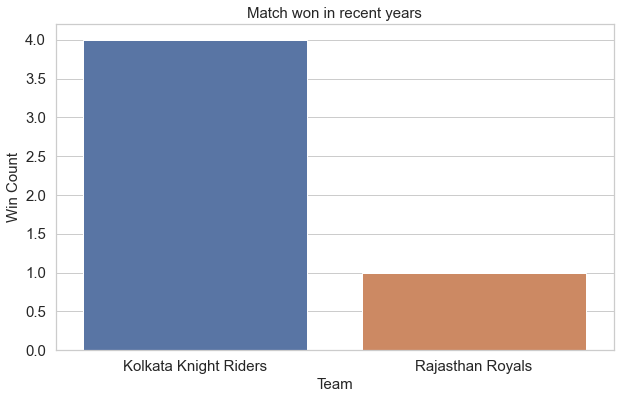

In [113]:
plt.figure(figsize = (10,6))
sns.countplot(final['winner'])
plt.title('Match won in recent years',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Win Count',fontsize=15)

plt.show()

From all the above analysis related to Head to Head, Toss analysis,Performance Analysis, Recent year analysis etc we saw that KKR has better chances of winning the match specially if they chase the score.